## Partie 1:

In [1]:
 # Etablire la connection entre le drive et google colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# les bibliothéques utilisés pour exécuter notre code
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
import matplotlib


In [3]:
# L'importation de données la sèance 1, le passage 10 et la fréquence 20Hz (filtre)
df = pd.read_excel ('/content/drive/MyDrive/Runlight/Datatest_S1_P10/datatest_F20_S1_P10.xlsx')
#afficher les 10 premiers lignes
df.head(10)

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,tibia_X,tibia_Y,tibia_Z,lumbar_X,lumbar_Y,lumbar_Z,sortie
0,-0.438289,-0.776379,-0.883225,0.066348,-0.036563,0.815381,32.857388
1,-0.436429,-0.775983,-0.881375,0.068063,-0.037114,0.816524,34.102877
2,-0.434564,-0.775589,-0.879522,0.069785,-0.037667,0.817661,35.317585
3,-0.432696,-0.775197,-0.877665,0.071514,-0.038220,0.818791,36.501476
4,-0.430824,-0.774806,-0.875806,0.073248,-0.038776,0.819917,37.654515
5,-0.428946,-0.774416,-0.873943,0.074987,-0.039333,0.821039,38.776665
6,-0.427062,-0.774027,-0.872077,0.076730,-0.039891,0.822157,39.867891
7,-0.425174,-0.773639,-0.870208,0.078475,-0.040448,0.823273,40.928158
8,-0.423279,-0.773252,-0.868337,0.080222,-0.041005,0.824385,41.957428
9,-0.421379,-0.772867,-0.866463,0.081970,-0.041559,0.825494,42.955667


In [4]:
# La taille se notre base de données
df.shape

(5000, 7)

In [5]:
# Définir les variables indépendantes  X et les variables dépendantes  Y
X = df[['tibia_X','tibia_Y','tibia_Z','lumbar_X','lumbar_Y','lumbar_Z']]
Y = df['sortie']

### Base données d'entrainement et base de test

In [ ]:
# 20% pour le test et 80% pour l'entrainement càd 80 pas pour l'entrainement et 20 pas pour le test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4000, 6)
(1000, 6)
(4000,)
(1000,)


### Création de model (regression polynomial)

In [ ]:
#PolynomialFeaturesest une classe du sklearn.preprocessing module 
#de la bibliothèque scikit-learn. Il est utilisé pour transformer 
#les données d'entrée en ajoutant des caractéristiques polynomiales.

poly = PolynomialFeatures(degree=3)
Modified_X_train = poly.fit_transform(X_train)
Modified_X_test = poly.fit_transform(X_test)

# Application de LassoCV est une classe utilise la validation 
# croisée pour régler automatiquement le paramètre de régularisation du modèle Lasso, 
#ce qui aide à trouver le meilleur équilibre entre l'ajustement des données 
#et la réduction de la complexité du modèle. Cela permet également d'éviter le sur-ajustement.

# n_jobs" est un paramètre pour LassoCV qui spécifie le nombre de processeurs à utiliser pour effectuer la régression.
# n_jobs=-1, cela signifie que on a utilisé tous les processeurs disponibles sur notre ordinateur. 

#"verbose" est un paramètre qui spécifie si on veux que LassoCV affiche des informations sur les itérations en cours d'exécution. 
# Si on mis verbose=False, LassoCV ne produira pas de sortie de texte, 
#sinon il affichera des informations sur les itérations et les valeurs de pénalisation testées.
les = LassoCV(n_jobs = -1, verbose=False)

# l'entrainement de modèle
les.fit(Modified_X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.208e+05, tolerance: 1.058e+05
  model = cd_fast.enet_coordinate_descent(


LassoCV(n_jobs=-1)

In [ ]:
# calcule le RMSE : le racine quaré de mean squard error pour les données d'entrainement et de test
Lasso_Reg_Train_RMSE = np.sqrt(mean_squared_error(Y_train,les.predict(Modified_X_train)))
Lasso_Reg_Test_RMSE = np.sqrt(mean_squared_error(Y_test,les.predict(Modified_X_test)))

print('Train RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Train_RMSE)
print('Test RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Test_RMSE)

# calcule le R2
print("Best score (r2) using built-in LassoCV: %f" %les.score(Modified_X_train,Y_train))

Train RMSE of Lasso regression of model of degree 3 is : 14.077556941708615
Test RMSE of Lasso regression of model of degree 3 is : 14.042183188933324
Best score (r2) using built-in LassoCV: 0.999251


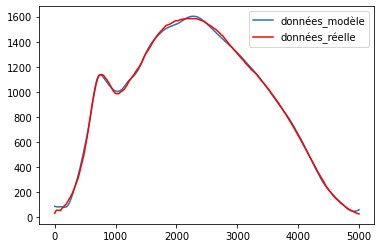

In [ ]:
#Application de notre modéle sur tt les X
poly = PolynomialFeatures(degree=3)
Modified_X = poly.fit_transform(X)

# affichage de la courbe
plt.plot(les.predict(Modified_X))
plt.plot(Y, 'r')

plt.legend(["données_modèle", "données_réelle"], loc=1)


# NB: on a testé toutes les fréquences ( de 5Hz à 50Hz) comme vous pouvez voir sur le rapport

### Partie 2

In [ ]:
# L'importation de la base d'entrainement
df= pd.read_excel('/content/drive/MyDrive/Runlight/datatest_09_01_2023/datatest_F20_8P.xlsx')

# les variables x et y d'entrainement
X = df[['tibia_X','tibia_Y','tibia_Z','lumbar_X','lumbar_Y','lumbar_Z']]
Y = df['sortie']

# l'importation de la base de test
df1= pd.read_excel('/content/drive/MyDrive/Runlight/datatest_09_01_2023/datatest_F20_S0_P10.xlsx')

# les variables x et y d'entrainement
X1 = df1[['tibia_X','tibia_Y','tibia_Z','lumbar_X','lumbar_Y','lumbar_Z']]
Y1 = df1['sortie']

# la taille de données d'entrainement
print( "les X de l'entrainement :", X.shape)
print("les Y de l'entrainement : " ,Y.shape)

# la taille de données de test
print( "les X1 de test :", X1.shape)
print("les Y1 de test: " ,Y1.shape)

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


les X de l'entrainement : (40000, 6)
les Y de l'entrainement :  (40000,)
les X1 de test : (5000, 6)
les Y1 de test:  (5000,)


In [ ]:
# la normalisation des données d'entrainement et de test à l'aide de StandardScaler le module de la bibliothèque scikit-learn, 
#qui permet de normaliser les données en les centrant et en les réduisant.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, Y_train = scaler.fit_transform(X), Y.values.reshape(-1,1)
X_test, Y_test = scaler.fit_transform(X1), Y1.values.reshape(-1,1)

In [ ]:
poly = PolynomialFeatures(degree=3)
Modified_X_train = poly.fit_transform(X_train)
Modified_X_test = poly.fit_transform(X_test)

# n_jobs" est un paramètre pour LassoCV qui spécifie le nombre de processeurs à utiliser pour effectuer la régression.
# n_jobs=-1, cela signifie que on a utilisé tous les processeurs disponibles sur notre ordinateur. 

#"verbose" est un paramètre qui spécifie si on veux que LassoCV affiche des informations sur les itérations en cours d'exécution. 
# Si on mis verbose=False, LassoCV ne produira pas de sortie de texte, 
#sinon il affichera des informations sur les itérations et les valeurs de pénalisation testées.
les = LassoCV(n_jobs = -1, verbose=False)
les.fit(Modified_X_train,Y_train )



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.708e+06, tolerance: 1.089e+06
  model = cd_fast.enet_coordinate_descent(


LassoCV(n_jobs=-1)

In [ ]:
# calcule le RMSE le racine quaré de mean squard error pour les données d'entrainement et de test
Lasso_Reg_Train_RMSE = np.sqrt(mean_squared_error(Y_train,les.predict(Modified_X_train)))
Lasso_Reg_Test_RMSE = np.sqrt(mean_squared_error(Y_test,les.predict(Modified_X_test)))

print('Train RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Train_RMSE)
print('Test RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Test_RMSE)

# calcule le R2 pour les données d'entrainement et de test
print("Best score (r2) for Data train using built-in LassoCV: %f" %les.score(Modified_X_train,Y_train))
print("Best score (r2) for Data test using built-in LassoCV: %f" %les.score(Modified_X_test,Y_test))

Train RMSE of Lasso regression of model of degree 3 is : 47.393853779323784
Test RMSE of Lasso regression of model of degree 3 is : 70.05992603180448
Best score (r2) for Data train using built-in LassoCV: 0.991753
Best score (r2) for Data test using built-in LassoCV: 0.981366


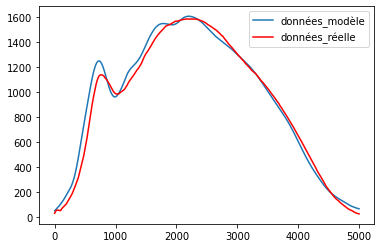

In [ ]:
#Application de notre modéle sur les données de test df1
poly = PolynomialFeatures(degree=3)
Modified_X = poly.fit_transform(X_test)

plt.plot(les.predict(Modified_X))
plt.plot(Y_test, 'r')
plt.legend(["données_modèle", "données_réelle"], loc=1)

Train RMSE of Lasso regression of model of degree 3 is : 47.393853779323784
Test RMSE of Lasso regression of model of degree 3 is : 79.55181505445343
Best score (r2) using built-in LassoCV: 0.991753
Best score (r2) for Data test using built-in LassoCV: 0.975208


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


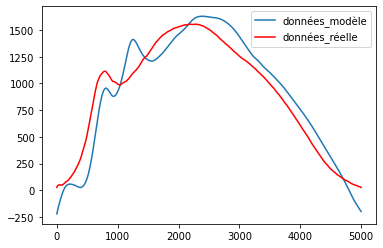

In [ ]:
df2= pd.read_excel('/content/drive/MyDrive/Runlight/datatest_09_01_2023/datatest_F20_S10_P10.xlsx')


X2 = df2[['tibia_X','tibia_Y','tibia_Z','lumbar_X','lumbar_Y','lumbar_Z']]
Y2 = df2['sortie']

X_test, Y_test = scaler.fit_transform(X2), Y2.values.reshape(-1,1)
Modified_X_test = poly.fit_transform(X_test)


Lasso_Reg_Train_RMSE = np.sqrt(mean_squared_error(Y_train,les.predict(Modified_X_train)))
Lasso_Reg_Test_RMSE = np.sqrt(mean_squared_error(Y_test,les.predict(Modified_X_test)))

print('Train RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Train_RMSE)
print('Test RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Test_RMSE)
print("Best score (r2) using built-in LassoCV: %f" %les.score(Modified_X_train,Y_train))
print("Best score (r2) for Data test using built-in LassoCV: %f" %les.score(Modified_X_test,Y_test))

#Application de notre modéle sur les données de test df2
poly = PolynomialFeatures(degree=3)
Modified_X = poly.fit_transform(X_test)

plt.plot(les.predict(Modified_X))
plt.plot(Y_test, 'r')
plt.legend(["données_modèle", "données_réelle"], loc=1)

Train RMSE of Lasso regression of model of degree 3 is : 47.393853779323784
Test RMSE of Lasso regression of model of degree 3 is : 70.05992603180448
Best score (r2) for Data train using built-in LassoCV: 0.991753
Best score (r2) for Data test using built-in LassoCV: 0.981366


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


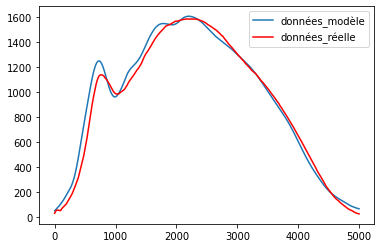

In [ ]:
df3= pd.read_excel('/content/drive/MyDrive/Runlight/datatest_09_01_2023/datatest_F20_S1_P10.xlsx')


X3 = df3[['tibia_X','tibia_Y','tibia_Z','lumbar_X','lumbar_Y','lumbar_Z']]
Y3 = df3['sortie']

X_test, Y_test = scaler.fit_transform(X3), Y3.values.reshape(-1,1)
Modified_X_test = poly.fit_transform(X_test)

Lasso_Reg_Train_RMSE = np.sqrt(mean_squared_error(Y_train,les.predict(Modified_X_train)))
Lasso_Reg_Test_RMSE = np.sqrt(mean_squared_error(Y_test,les.predict(Modified_X_test)))

print('Train RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Train_RMSE)
print('Test RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Test_RMSE)
print("Best score (r2) for Data train using built-in LassoCV: %f" %les.score(Modified_X_train,Y_train))
print("Best score (r2) for Data test using built-in LassoCV: %f" %les.score(Modified_X_test,Y_test))

#Application de notre modéle sur les données de test df3
poly = PolynomialFeatures(degree=3)
Modified_X = poly.fit_transform(X_test)

plt.plot(les.predict(Modified_X))
plt.plot(Y_test, 'r')
plt.legend(["données_modèle", "données_réelle"], loc=1)

Train RMSE of Lasso regression of model of degree 3 is : 47.393853779323784
Test RMSE of Lasso regression of model of degree 3 is : 109.60037141796107
Best score (r2) for Data train using built-in LassoCV: 0.991753
Best score (r2) for Data test using built-in LassoCV: 0.953643


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


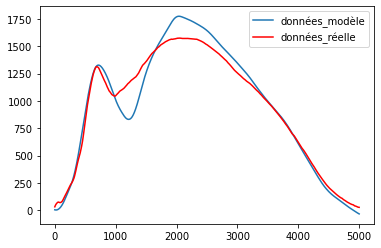

In [ ]:
df4= pd.read_excel('/content/drive/MyDrive/Runlight/datatest_09_01_2023/datatest_F20_S2_P10.xlsx')


X4 = df4[['tibia_X','tibia_Y','tibia_Z','lumbar_X','lumbar_Y','lumbar_Z']]
Y4 = df4['sortie']

X_test, Y_test = scaler.fit_transform(X4), Y4.values.reshape(-1,1)
Modified_X_test = poly.fit_transform(X_test)

Lasso_Reg_Train_RMSE = np.sqrt(mean_squared_error(Y_train,les.predict(Modified_X_train)))
Lasso_Reg_Test_RMSE = np.sqrt(mean_squared_error(Y_test,les.predict(Modified_X_test)))

print('Train RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Train_RMSE)
print('Test RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Test_RMSE)
print("Best score (r2) for Data train using built-in LassoCV: %f" %les.score(Modified_X_train,Y_train))
print("Best score (r2) for Data test using built-in LassoCV: %f" %les.score(Modified_X_test,Y_test))

#Application de notre modéle sur les données de test df4
poly = PolynomialFeatures(degree=3)
Modified_X = poly.fit_transform(X_test)

plt.plot(les.predict(Modified_X))
plt.plot(Y_test, 'r')
plt.legend(["données_modèle", "données_réelle"], loc=1)

Train RMSE of Lasso regression of model of degree 3 is : 47.393853779323784
Test RMSE of Lasso regression of model of degree 3 is : 176.57585252342514
Best score (r2) for data train using built-in LassoCV: 0.991753
Best score (r2) for Data test using built-in LassoCV: 0.870826


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


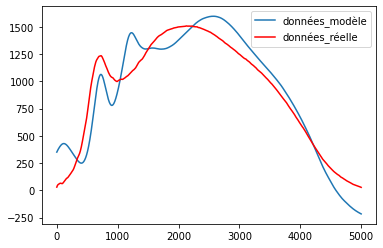

In [ ]:
df5= pd.read_excel('/content/drive/MyDrive/Runlight/datatest_09_01_2023/datatest_F20_S3_P10.xlsx')

X5 = df5[['tibia_X','tibia_Y','tibia_Z','lumbar_X','lumbar_Y','lumbar_Z']]
Y5 = df5['sortie']

X_test, Y_test = scaler.fit_transform(X5), Y5.values.reshape(-1,1)
Modified_X_test = poly.fit_transform(X_test)

Lasso_Reg_Train_RMSE = np.sqrt(mean_squared_error(Y_train,les.predict(Modified_X_train)))
Lasso_Reg_Test_RMSE = np.sqrt(mean_squared_error(Y_test,les.predict(Modified_X_test)))

print('Train RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Train_RMSE)
print('Test RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Test_RMSE)
print("Best score (r2) for data train using built-in LassoCV: %f" %les.score(Modified_X_train,Y_train))
print("Best score (r2) for Data test using built-in LassoCV: %f" %les.score(Modified_X_test,Y_test))

#Application de notre modéle sur les données de test df5
poly = PolynomialFeatures(degree=3)
Modified_X = poly.fit_transform(X_test)

plt.plot(les.predict(Modified_X))
plt.plot(Y_test, 'r')
plt.legend(["données_modèle", "données_réelle"], loc=1)

Train RMSE of Lasso regression of model of degree 3 is : 47.393853779323784
Test RMSE of Lasso regression of model of degree 3 is : 472.18512314585854
Best score (r2) for data train using built-in LassoCV: 0.991753
Best score (r2) for Data test using built-in LassoCV: 0.094902


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


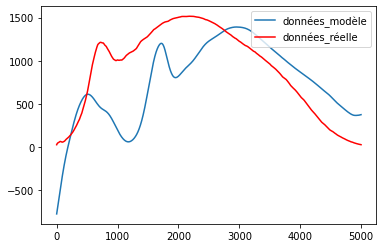

In [ ]:
df6= pd.read_excel('/content/drive/MyDrive/Runlight/datatest_09_01_2023/datatest_F20_S4_P10.xlsx')


X6 = df6[['tibia_X','tibia_Y','tibia_Z','lumbar_X','lumbar_Y','lumbar_Z']]
Y6 = df6['sortie']

X_test, Y_test = scaler.fit_transform(X6), Y6.values.reshape(-1,1)
Modified_X_test = poly.fit_transform(X_test)

Lasso_Reg_Train_RMSE = np.sqrt(mean_squared_error(Y_train,les.predict(Modified_X_train)))
Lasso_Reg_Test_RMSE = np.sqrt(mean_squared_error(Y_test,les.predict(Modified_X_test)))

print('Train RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Train_RMSE)
print('Test RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Test_RMSE)
print("Best score (r2) for data train using built-in LassoCV: %f" %les.score(Modified_X_train,Y_train))
print("Best score (r2) for Data test using built-in LassoCV: %f" %les.score(Modified_X_test,Y_test))

#Application de notre modéle sur les données de test df6
poly = PolynomialFeatures(degree=3)
Modified_X = poly.fit_transform(X_test)

plt.plot(les.predict(Modified_X))
plt.plot(Y_test, 'r')
plt.legend(["données_modèle", "données_réelle"], loc=1)

Train RMSE of Lasso regression of model of degree 3 is : 47.393853779323784
Test RMSE of Lasso regression of model of degree 3 is : 401.7385820592944
Best score (r2) for Data train using built-in LassoCV: 0.991753
Best score (r2) for Data test using built-in LassoCV: 0.367325


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


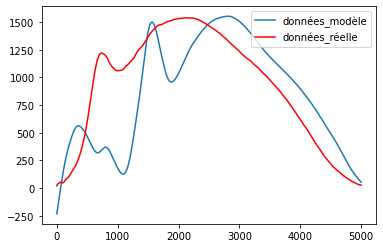

In [ ]:
df7= pd.read_excel('/content/drive/MyDrive/Runlight/datatest_09_01_2023/datatest_F20_S5_P10.xlsx')


X7 = df7[['tibia_X','tibia_Y','tibia_Z','lumbar_X','lumbar_Y','lumbar_Z']]
Y7 = df7['sortie']

X_test, Y_test = scaler.fit_transform(X7), Y7.values.reshape(-1,1)
Modified_X_test = poly.fit_transform(X_test)

Lasso_Reg_Train_RMSE = np.sqrt(mean_squared_error(Y_train,les.predict(Modified_X_train)))
Lasso_Reg_Test_RMSE = np.sqrt(mean_squared_error(Y_test,les.predict(Modified_X_test)))

print('Train RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Train_RMSE)
print('Test RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Test_RMSE)
print("Best score (r2) for Data train using built-in LassoCV: %f" %les.score(Modified_X_train,Y_train))
print("Best score (r2) for Data test using built-in LassoCV: %f" %les.score(Modified_X_test,Y_test))

#Application de notre modéle sur les données de test df7
poly = PolynomialFeatures(degree=3)
Modified_X = poly.fit_transform(X_test)

plt.plot(les.predict(Modified_X))
plt.plot(Y_test, 'r')
plt.legend(["données_modèle", "données_réelle"], loc=1)

Train RMSE of Lasso regression of model of degree 3 is : 47.393853779323784
Test RMSE of Lasso regression of model of degree 3 is : 342.28126415996553
Best score (r2) for Data train using built-in LassoCV: 0.991753
Best score (r2) for Data test using built-in LassoCV: 0.551098


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


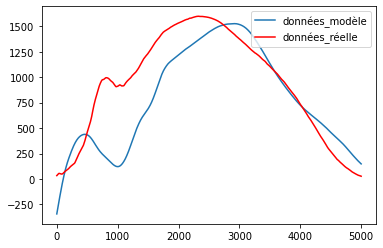

In [ ]:
df8= pd.read_excel('/content/drive/MyDrive/Runlight/datatest_09_01_2023/datatest_F20_S6_P10.xlsx')

X8 = df8[['tibia_X','tibia_Y','tibia_Z','lumbar_X','lumbar_Y','lumbar_Z']]
Y8 = df8['sortie']

X_test, Y_test = scaler.fit_transform(X8), Y8.values.reshape(-1,1)
Modified_X_test = poly.fit_transform(X_test)

Lasso_Reg_Train_RMSE = np.sqrt(mean_squared_error(Y_train,les.predict(Modified_X_train)))
Lasso_Reg_Test_RMSE = np.sqrt(mean_squared_error(Y_test,les.predict(Modified_X_test)))

print('Train RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Train_RMSE)
print('Test RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Test_RMSE)
print("Best score (r2) for Data train using built-in LassoCV: %f" %les.score(Modified_X_train,Y_train))
print("Best score (r2) for Data test using built-in LassoCV: %f" %les.score(Modified_X_test,Y_test))

#Application de notre modéle sur les données de test df8
poly = PolynomialFeatures(degree=3)
Modified_X = poly.fit_transform(X_test)

plt.plot(les.predict(Modified_X))
plt.plot(Y_test, 'r')
plt.legend(["données_modèle", "données_réelle"], loc=1)

Train RMSE of Lasso regression of model of degree 3 is : 47.393853779323784
Test RMSE of Lasso regression of model of degree 3 is : 286.7419471352273
Best score (r2) for Data train using built-in LassoCV: 0.991753
Best score (r2) for Data test using built-in LassoCV: 0.715942


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


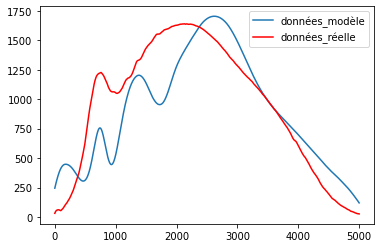

In [ ]:
df9= pd.read_excel('/content/drive/MyDrive/Runlight/datatest_09_01_2023/datatest_F20_S7_P10.xlsx')


X9 = df9[['tibia_X','tibia_Y','tibia_Z','lumbar_X','lumbar_Y','lumbar_Z']]
Y9 = df9['sortie']

X_test, Y_test = scaler.fit_transform(X9), Y9.values.reshape(-1,1)
Modified_X_test = poly.fit_transform(X_test)

Lasso_Reg_Train_RMSE = np.sqrt(mean_squared_error(Y_train,les.predict(Modified_X_train)))
Lasso_Reg_Test_RMSE = np.sqrt(mean_squared_error(Y_test,les.predict(Modified_X_test)))

print('Train RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Train_RMSE)
print('Test RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Test_RMSE)
print("Best score (r2) for Data train using built-in LassoCV: %f" %les.score(Modified_X_train,Y_train))
print("Best score (r2) for Data test using built-in LassoCV: %f" %les.score(Modified_X_test,Y_test))

#Application de notre modéle sur les données de test df9
poly = PolynomialFeatures(degree=3)
Modified_X = poly.fit_transform(X_test)

plt.plot(les.predict(Modified_X))
plt.plot(Y_test, 'r')
plt.legend(["données_modèle", "données_réelle"], loc=1)

Train RMSE of Lasso regression of model of degree 3 is : 47.393853779323784
Test RMSE of Lasso regression of model of degree 3 is : 333.59163132895316
Best score (r2) data train using built-in LassoCV: 0.991753
Best score (r2) for Data test using built-in LassoCV: 0.567510


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


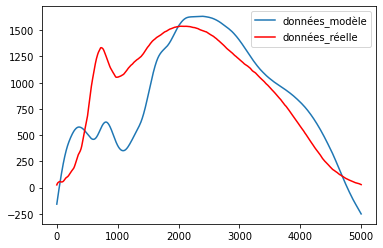

In [ ]:
df10= pd.read_excel('/content/drive/MyDrive/Runlight/datatest_09_01_2023/datatest_F20_S8_P10.xlsx')


X10 = df10[['tibia_X','tibia_Y','tibia_Z','lumbar_X','lumbar_Y','lumbar_Z']]
Y10 = df10['sortie']

X_test, Y_test = scaler.fit_transform(X10), Y10.values.reshape(-1,1)
Modified_X_test = poly.fit_transform(X_test)

Lasso_Reg_Train_RMSE = np.sqrt(mean_squared_error(Y_train,les.predict(Modified_X_train)))
Lasso_Reg_Test_RMSE = np.sqrt(mean_squared_error(Y_test,les.predict(Modified_X_test)))

print('Train RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Train_RMSE)
print('Test RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Test_RMSE)
print("Best score (r2) data train using built-in LassoCV: %f" %les.score(Modified_X_train,Y_train))
print("Best score (r2) for Data test using built-in LassoCV: %f" %les.score(Modified_X_test,Y_test))

#Application de notre modéle sur les données de test df10
poly = PolynomialFeatures(degree=3)
Modified_X = poly.fit_transform(X_test)

plt.plot(les.predict(Modified_X))
plt.plot(Y_test, 'r')
plt.legend(["données_modèle", "données_réelle"], loc=1)

Train RMSE of Lasso regression of model of degree 3 is : 47.393853779323784
Test RMSE of Lasso regression of model of degree 3 is : 235.65715985665113
Best score (r2) for Data train using built-in LassoCV: 0.991753
Best score (r2) for Data test using built-in LassoCV: 0.798677


/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


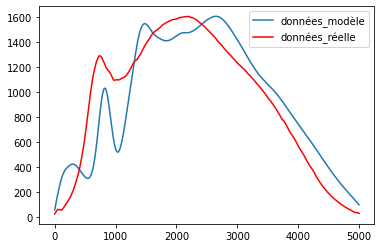

In [ ]:
df11= pd.read_excel('/content/drive/MyDrive/Runlight/datatest_09_01_2023/datatest_F20_S9_P10.xlsx')


X11 = df11[['tibia_X','tibia_Y','tibia_Z','lumbar_X','lumbar_Y','lumbar_Z']]
Y11 = df11['sortie']

X_test, Y_test = scaler.fit_transform(X11), Y11.values.reshape(-1,1)
Modified_X_test = poly.fit_transform(X_test)

Lasso_Reg_Train_RMSE = np.sqrt(mean_squared_error(Y_train,les.predict(Modified_X_train)))
Lasso_Reg_Test_RMSE = np.sqrt(mean_squared_error(Y_test,les.predict(Modified_X_test)))

print('Train RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Train_RMSE)
print('Test RMSE of Lasso regression of model of degree 3 is :',Lasso_Reg_Test_RMSE)
print("Best score (r2) for Data train using built-in LassoCV: %f" %les.score(Modified_X_train,Y_train))
print("Best score (r2) for Data test using built-in LassoCV: %f" %les.score(Modified_X_test,Y_test))

#Application de notre modéle sur les données de test df11
poly = PolynomialFeatures(degree=3)
Modified_X = poly.fit_transform(X_test)

plt.plot(les.predict(Modified_X))
plt.plot(Y_test, 'r')
plt.legend(["données_modèle", "données_réelle"], loc=1)
